In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.learning_curve import validation_curve

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
df = pd.read_csv('nfl_betting_df.csv', index_col = 0)

In [3]:
df = df[df.schedule_season > 1978]

In [31]:
df['exp_win_difference'] = df.home_exp_win_pct- df.away_exp_win_pct

In [32]:
df.dtypes

schedule_season          int64
schedule_week            int64
team_home               object
team_away               object
team_favorite_id        object
spread_favorite        float64
over_under_line        float64
weather_detail          object
weather_temperature    float64
weather_wind_mph       float64
weather_humidity       float64
score_home               int64
score_away               int64
point_total              int64
over_under_result       object
score_difference         int64
home_id                 object
away_id                 object
home_favorite            int64
favorite_covered         int64
winning_team            object
losing_team             object
home_wins                int64
home_losses              int64
home_ties                int64
away_wins                int64
away_losses              int64
away_ties                int64
home_points_for          int64
home_points_against      int64
away_points_for          int64
away_points_against      int64
h_games 

In [33]:
df.index = range(0, len(df))

In [34]:
df.columns

Index(['schedule_season', 'schedule_week', 'team_home', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line',
       'weather_detail', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'score_home', 'score_away', 'point_total',
       'over_under_result', 'score_difference', 'home_id', 'away_id',
       'home_favorite', 'favorite_covered', 'winning_team', 'losing_team',
       'home_wins', 'home_losses', 'home_ties', 'away_wins', 'away_losses',
       'away_ties', 'home_points_for', 'home_points_against',
       'away_points_for', 'away_points_against', 'h_games', 'a_games',
       'home_win_pct', 'away_win_pct', 'win_pct_diff', 'h_ppg', 'h_papg',
       'a_ppg', 'a_papg', 'home_pt_diff_pg', 'away_pt_diff_pg', 'pt_diff_pg',
       'home_exp_win_pct', 'away_exp_win_pct', 'exp_win_difference'],
      dtype='object')

In [35]:
df = df.fillna(value = 0)

In [36]:
# spread
# exp win %
# win %
# differential
# home favorite
# weather

# o/u
# weather
# wind
# ppg
# papg
# win %
# exp %
# differential


(-25, 10)

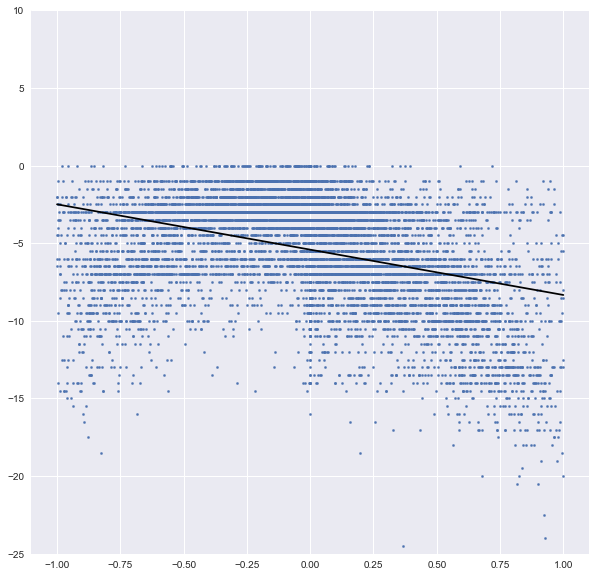

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

x = df.home_exp_win_pct - df.away_exp_win_pct
y = df.spread_favorite

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(-1, 1, 10000)
yfit = model.predict(xfit[:, np.newaxis])


plt.figure(figsize = (10,10))
plt.scatter(x, y, s = 5)
plt.plot(xfit, yfit, color = 'black')
plt.ylim(-25,10)

In [38]:
reg_df = df[(df.schedule_week > 1) & (df.schedule_week < 19)]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


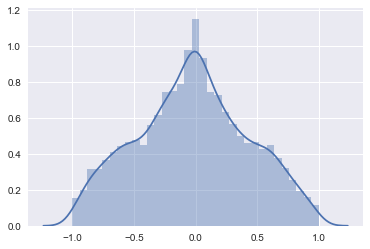

In [13]:
sns.distplot(reg_df.home_exp_win_pct- reg_df.away_exp_win_pct)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(-10, 0)

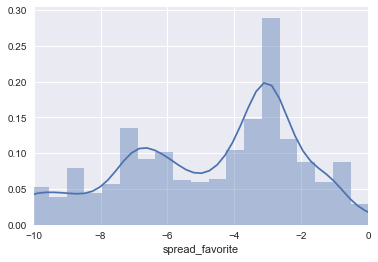

In [14]:
ax = sns.distplot(reg_df.spread_favorite)
ax.set_xlim(-10,0)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


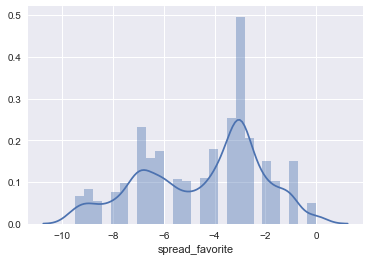

In [15]:
sns.distplot((reg_df.spread_favorite[reg_df['spread_favorite']>-10]))

In [16]:
reg_df['spread_favorite'].median()

-4.5

In [17]:
reg_df.columns

Index(['schedule_season', 'schedule_week', 'team_home', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line',
       'weather_detail', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'score_home', 'score_away', 'point_total',
       'over_under_result', 'score_difference', 'home_id', 'away_id',
       'home_favorite', 'favorite_covered', 'winning_team', 'losing_team',
       'home_wins', 'home_losses', 'home_ties', 'away_wins', 'away_losses',
       'away_ties', 'home_points_for', 'home_points_against',
       'away_points_for', 'away_points_against', 'h_games', 'a_games',
       'home_win_pct', 'away_win_pct', 'win_pct_diff', 'h_ppg', 'h_papg',
       'a_ppg', 'a_papg', 'home_pt_diff_pg', 'away_pt_diff_pg', 'pt_diff_pg',
       'home_exp_win_pct', 'away_exp_win_pct'],
      dtype='object')

In [18]:
pivot = reg_df.pivot_table(index='spread_favorite', columns='favorite_covered',
                    aggfunc={'favorite_covered':len}, fill_value = 0)

In [19]:
pivot['row_total'] = 0
for index, row in pivot.iterrows():
    row.row_total = sum(row)

In [20]:
covered = pivot.favorite_covered[1]
no_cover = pivot.favorite_covered[0]
push = pivot.favorite_covered[2]

In [21]:
spreads = sorted(set(reg_df.spread_favorite))
x = np.array([spread for spread in spreads if spread > -15 and spread < 0])

In [22]:
y_covered = [covered[value]/pivot['row_total'][value] for value in x]
y_no_cover = [no_cover[value]/pivot['row_total'][value] for value in x]
y_push = [push[value]/pivot['row_total'][value] for value in x]

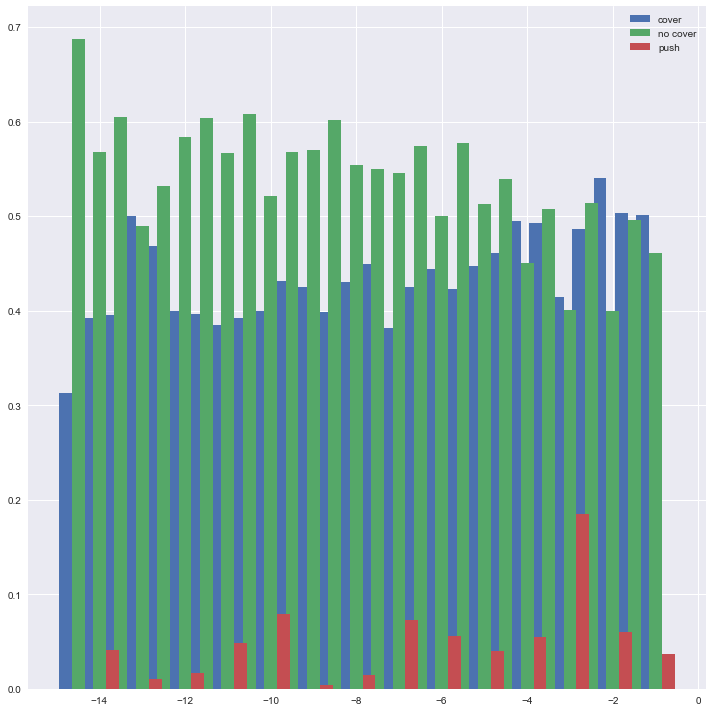

In [23]:
plt.figure(figsize = (10,10))
plt.bar(x-.3,y_covered, label = 'cover', width = .3)
plt.bar(x,y_no_cover, label = 'no cover', width = .3)
plt.bar(x+.3,y_push, label = 'push', width = .3)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=x,
    y=y_covered,
    name='Covered'
)
trace2 = go.Bar(
    x=x,
    y=y_no_cover,
    name='No Cover'
)

trace3 = go.Bar(
    x=x,
    y=y_push,
    name='Push'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [278]:
x = reg_df.corr()
x_dict = x['over_under_line'].to_dict()
sorted_dict = sorted(x_dict.items(), key = lambda x:x[1])
sorted_dict

[('weather_humidity', -0.29694144154210217),
 ('weather_wind_mph', -0.24000478596726751),
 ('away_losses', -0.08330609896049508),
 ('home_losses', -0.08267674818430351),
 ('spread_favorite', -0.05004687010164127),
 ('schedule_week', -0.0319572692531609),
 ('favorite_covered', -0.031055883056551034),
 ('h_games', -0.027690759842409755),
 ('a_games', -0.02768914644990867),
 ('home_favorite', -0.024416510241578426),
 ('home_ties', -0.005558674558758103),
 ('win_pct_diff', -0.00215672845433652),
 ('pt_diff_pg', -0.002012704487403916),
 ('exp_win_difference', 0.0010001643110181565),
 ('score_difference', 0.002084440114043298),
 ('away_ties', 0.018907222409069096),
 ('away_wins', 0.04092927686455585),
 ('home_wins', 0.04126421194150724),
 ('away_points_against', 0.08525058937791523),
 ('home_win_pct', 0.0894420873031792),
 ('away_win_pct', 0.09271691487513734),
 ('home_points_against', 0.09640670117583),
 ('away_exp_win_pct', 0.11388363861910329),
 ('home_exp_win_pct', 0.11580747805073124),


In [249]:
reg_df

,schedule_season,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,weather_detail,weather_temperature,weather_wind_mph,...,h_ppg,h_papg,a_ppg,a_papg,home_pt_diff_pg,away_pt_diff_pg,pt_diff_pg,home_exp_win_pct,away_exp_win_pct,exp_win_difference
14,1979,2,Denver Broncos,Los Angeles Rams,DEN,-2.0,31.5,0,67.0,8.0,...,10.00,0.00,17.00,24.00,10.000,-7.000,17.000,1.000000,0.127821,0.872179
15,1979,2,Baltimore Colts,Tampa Bay Buccaneers,PICK,0.0,33.0,0,64.0,8.0,...,0.00,14.00,31.00,16.00,-14.000,15.000,-29.000,0.000000,0.978516,-0.978516
16,1979,2,Buffalo Bills,Cincinnati Bengals,CIN,-3.0,34.0,0,54.0,7.0,...,7.00,9.00,0.00,10.00,-2.000,-10.000,8.000,0.260223,0.000000,0.260223
17,1979,2,Chicago Bears,Minnesota Vikings,CHI,-6.0,31.5,0,60.0,11.0,...,6.00,3.00,28.00,22.00,3.000,6.000,-3.000,0.907498,0.804520,0.102978
18,1979,2,Detroit Lions,Washington Redskins,PICK,0.0,35.5,DOME,72.0,0.0,...,16.00,31.00,27.00,29.00,-15.000,-2.000,-13.000,0.021484,0.393801,-0.372317
19,1979,2,Green Bay Packers,New Orleans Saints,GB,-3.0,35.0,0,60.0,13.0,...,3.00,6.00,34.00,40.00,-3.000,-6.000,3.000,0.092502,0.259418,-0.166916
20,1979,2,Kansas City Chiefs,Cleveland Browns,PICK,0.0,36.0,0,71.0,14.0,...,14.00,0.00,25.00,22.00,14.000,3.000,11.000,1.000000,0.676575,0.323425
21,1979,2,Miami Dolphins,Seattle Seahawks,MIA,-7.0,40.5,0,81.0,13.0,...,9.00,7.00,16.00,33.00,2.000,-17.000,19.000,0.739777,0.014415,0.725362
22,1979,2,New England Patriots,New York Jets,NE,-8.0,42.0,0,59.0,12.0,...,13.00,16.00,22.00,25.00,-3.000,-3.000,0.000,0.259520,0.323425,-0.063905
23,1979,2,New York Giants,St. Louis Cardinals,ARI,-3.0,36.0,0,63.0,13.0,...,17.00,23.00,21.00,22.00,-6.000,-1.000,-5.000,0.158136,0.434777,-0.276641


In [181]:
reg_df.describe()

,schedule_season,schedule_week,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,weather_humidity,score_home,score_away,point_total,...,h_ppg,h_papg,a_ppg,a_papg,home_pt_diff_pg,away_pt_diff_pg,pt_diff_pg,home_exp_win_pct,away_exp_win_pct,exp_win_difference
count,8647.000000,8647.000000,8647.000000,8647.000000,8647.000000,8647.000000,8647.000000,8647.000000,8647.000000,8647.000000,...,8647.000000,8647.000000,8647.000000,8647.000000,8647.000000,8647.000000,8647.000000,8647.000000,8647.000000,8647.000000
mean,1998.897999,9.447554,-5.397710,41.674303,58.780849,7.526310,45.132763,22.520412,19.782584,42.302995,...,20.901550,21.196252,21.263579,20.941425,-0.294727,0.322174,-0.613084,0.489505,0.511983,-0.022478
std,11.141074,4.616347,3.447296,4.535723,15.451669,5.754036,33.757599,10.331360,10.045186,14.223417,...,5.742376,5.396974,5.826114,5.421112,8.147139,8.275171,11.567205,0.319761,0.321197,0.451533
min,1979.000000,2.000000,-26.500000,28.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,-45.000000,-51.000000,-61.000000,0.000000,0.000000,-0.999807
25%,1990.000000,5.000000,-7.000000,38.000000,48.000000,2.000000,0.000000,15.500000,13.000000,32.000000,...,17.220000,17.895000,17.500000,17.545000,-5.333000,-4.818000,-7.631000,0.190720,0.213197,-0.335245
50%,1999.000000,10.000000,-4.500000,41.500000,62.000000,8.000000,57.000000,22.000000,20.000000,41.000000,...,20.700000,21.000000,21.000000,20.770000,-0.200000,0.400000,-0.500000,0.486912,0.527456,-0.018296
75%,2008.000000,13.000000,-3.000000,44.500000,72.000000,11.000000,74.000000,30.000000,27.000000,51.000000,...,24.300000,24.380000,24.730000,24.105000,4.833000,5.500000,6.646500,0.785555,0.813422,0.290449
max,2017.000000,18.000000,0.000000,63.000000,93.000000,40.000000,100.000000,62.000000,59.000000,106.000000,...,51.000000,52.000000,52.000000,51.000000,51.000000,45.000000,66.000000,1.000000,1.000000,1.000000


In [220]:
def poly_regression(x, y, degree_range, xlim_min, xlim_max, ylim_min, ylim_max,xfit1, xfit2, alpha = .75,s = 5,width = 2.5):
    plt.figure(figsize = (10,10))
    plt.scatter(x, y, s = s, alpha = alpha)
    plt.ylim(ylim_min, ylim_max)
    plt.xlim(xlim_min,xlim_max)
    for degree in degree_range:
        poly_model = make_pipeline(PolynomialFeatures(degree),
                               LinearRegression())
        poly_model.fit(x[:, np.newaxis], y)
        xfit = np.linspace(xfit1,xfit2, 10000)
        yfit = poly_model.predict(xfit[:, np.newaxis])
        plt.plot(xfit, yfit, label = 'degree={}'.format(degree),linewidth=width)
    plt.legend(loc = 'best')
        



In [284]:
reg_df['total_ppg'] = (reg_df.h_ppg + reg_df.a_ppg)
reg_df['total_points_against'] = (reg_df.h_papg + reg_df.a_papg)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [285]:
reg_df

,schedule_season,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,weather_detail,weather_temperature,weather_wind_mph,...,a_ppg,a_papg,home_pt_diff_pg,away_pt_diff_pg,pt_diff_pg,home_exp_win_pct,away_exp_win_pct,exp_win_difference,total_ppg,total_points_against
14,1979,2,Denver Broncos,Los Angeles Rams,DEN,-2.0,31.5,0,67.0,8.0,...,17.00,24.00,10.000,-7.000,17.000,1.000000,0.127821,0.872179,27.00,24.00
15,1979,2,Baltimore Colts,Tampa Bay Buccaneers,PICK,0.0,33.0,0,64.0,8.0,...,31.00,16.00,-14.000,15.000,-29.000,0.000000,0.978516,-0.978516,31.00,30.00
16,1979,2,Buffalo Bills,Cincinnati Bengals,CIN,-3.0,34.0,0,54.0,7.0,...,0.00,10.00,-2.000,-10.000,8.000,0.260223,0.000000,0.260223,7.00,19.00
17,1979,2,Chicago Bears,Minnesota Vikings,CHI,-6.0,31.5,0,60.0,11.0,...,28.00,22.00,3.000,6.000,-3.000,0.907498,0.804520,0.102978,34.00,25.00
18,1979,2,Detroit Lions,Washington Redskins,PICK,0.0,35.5,DOME,72.0,0.0,...,27.00,29.00,-15.000,-2.000,-13.000,0.021484,0.393801,-0.372317,43.00,60.00
19,1979,2,Green Bay Packers,New Orleans Saints,GB,-3.0,35.0,0,60.0,13.0,...,34.00,40.00,-3.000,-6.000,3.000,0.092502,0.259418,-0.166916,37.00,46.00
20,1979,2,Kansas City Chiefs,Cleveland Browns,PICK,0.0,36.0,0,71.0,14.0,...,25.00,22.00,14.000,3.000,11.000,1.000000,0.676575,0.323425,39.00,22.00
21,1979,2,Miami Dolphins,Seattle Seahawks,MIA,-7.0,40.5,0,81.0,13.0,...,16.00,33.00,2.000,-17.000,19.000,0.739777,0.014415,0.725362,25.00,40.00
22,1979,2,New England Patriots,New York Jets,NE,-8.0,42.0,0,59.0,12.0,...,22.00,25.00,-3.000,-3.000,0.000,0.259520,0.323425,-0.063905,35.00,41.00
23,1979,2,New York Giants,St. Louis Cardinals,ARI,-3.0,36.0,0,63.0,13.0,...,21.00,22.00,-6.000,-1.000,-5.000,0.158136,0.434777,-0.276641,38.00,45.00


# OVER/UNDER

# Variable 1 -Total Points Against

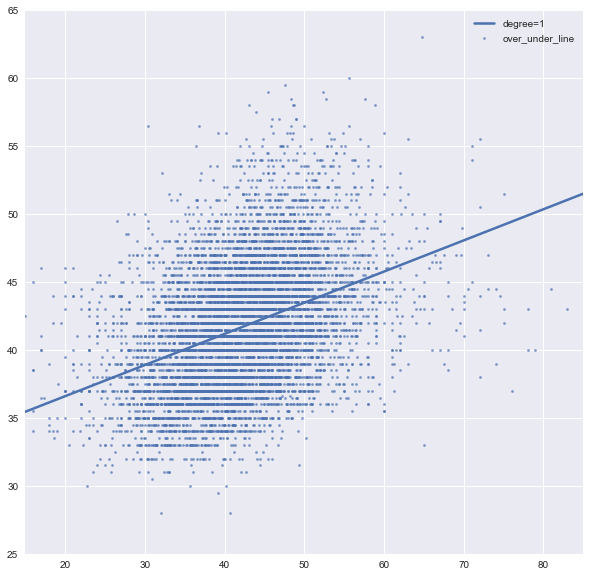

In [277]:
poly_regression((reg_df.total_points_against), reg_df.over_under_line, [1],15,85, 25, 65,10,150)

In [283]:
import statsmodels.api as sm
import statsmodels.formula.api as sm

# X = categorical **3
# X2 = sm.add_constant(X)
model = sm.ols(formula = 'over_under_line ~ np.power(total_points_against, 1)', data = reg_df).fit()

# est = sm.OLS(target, X2)
# est2 = est.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        over_under_line   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     1580.
Date:                Wed, 08 Aug 2018   Prob (F-statistic):          1.53e-317
Time:                        17:47:32   Log-Likelihood:                -24617.
No. Observations:                8647   AIC:                         4.924e+04
Df Residuals:                    8645   BIC:                         4.925e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

# VARIABLE 2 -TOTAL PPG

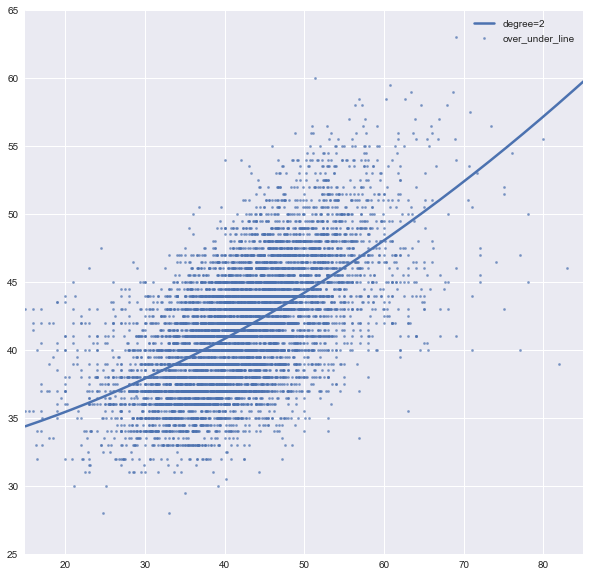

In [263]:
poly_regression((reg_df.total_ppg), reg_df.over_under_line, [2],15,85, 25, 65,10,150)

In [274]:
import statsmodels.api as sm
import statsmodels.formula.api as sm

# X = categorical **3
# X2 = sm.add_constant(X)
model = sm.ols(formula = 'over_under_line ~ np.power(total_ppg, 2)', data = reg_df).fit()

# est = sm.OLS(target, X2)
# est2 = est.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        over_under_line   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     4947.
Date:                Wed, 08 Aug 2018   Prob (F-statistic):               0.00
Time:                        17:41:15   Log-Likelihood:                -23387.
No. Observations:                8647   AIC:                         4.678e+04
Df Residuals:                    8645   BIC:                         4.679e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 34

## VARIABLE 3 -WEATHER HUMIDITY

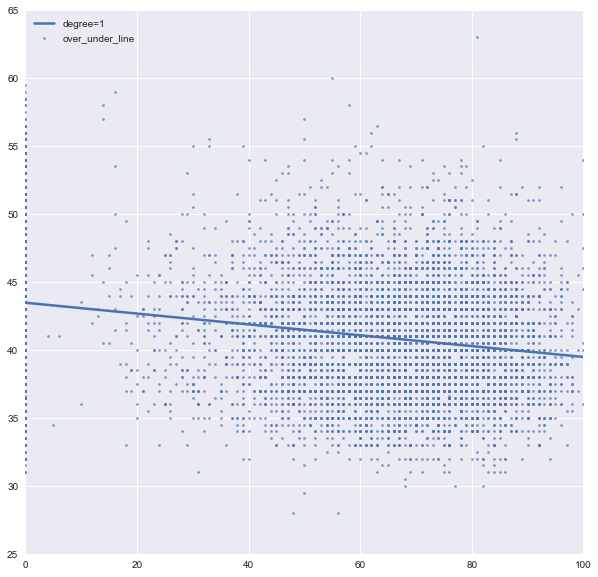

In [244]:
poly_regression(reg_df.weather_humidity, reg_df.over_under_line, [1],0,100, 25, 65,0,150)

In [248]:
import statsmodels.api as sm
import statsmodels.formula.api as sm

# X = categorical **3
# X2 = sm.add_constant(X)
model = sm.ols(formula = 'over_under_line ~ np.power(weather_humidity, 1)', data = reg_df).fit()

# est = sm.OLS(target, X2)
# est2 = est.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        over_under_line   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     836.0
Date:                Wed, 08 Aug 2018   Prob (F-statistic):          1.51e-175
Time:                        17:27:24   Log-Likelihood:                -24944.
No. Observations:                8647   AIC:                         4.989e+04
Df Residuals:                    8645   BIC:                         4.991e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

# VARIABLE 4 - WIND MPH

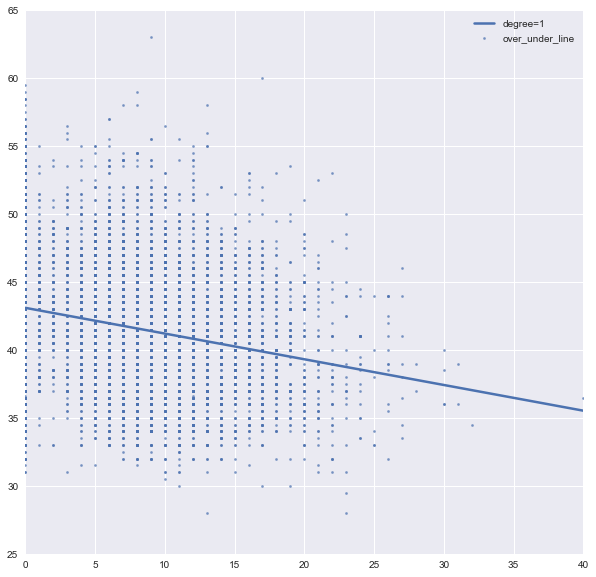

In [224]:
poly_regression(reg_df.weather_wind_mph, reg_df.over_under_line, [1],0,40, 25, 65,0,60)

In [211]:
import statsmodels.api as sm
import statsmodels.formula.api as sm

# X = categorical **3
# X2 = sm.add_constant(X)
model = sm.ols(formula = 'over_under_line ~ np.power(weather_wind_mph, 1)', data = reg_df).fit()

# est = sm.OLS(target, X2)
# est2 = est.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        over_under_line   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     528.4
Date:                Wed, 08 Aug 2018   Prob (F-statistic):          1.51e-113
Time:                        17:00:47   Log-Likelihood:                -25087.
No. Observations:                8647   AIC:                         5.018e+04
Df Residuals:                    8645   BIC:                         5.019e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [290]:
import statsmodels.api as sm
import statsmodels.formula.api as sm

# X = categorical **3
# X2 = sm.add_constant(X)
model = sm.ols(formula = 'over_under_line ~ weather_wind_mph + weather_humidity + total_points_against + np.power(total_ppg, 2)', data = reg_df).fit()

# est = sm.OLS(target, X2)
# est2 = est.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        over_under_line   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     2996.
Date:                Wed, 08 Aug 2018   Prob (F-statistic):               0.00
Time:                        17:54:01   Log-Likelihood:                -21582.
No. Observations:                8647   AIC:                         4.317e+04
Df Residuals:                    8642   BIC:                         4.321e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 26

# SPREAD 

# REJECTED DUE TO LOW HIGH CORRELATION WITH EXP WINS

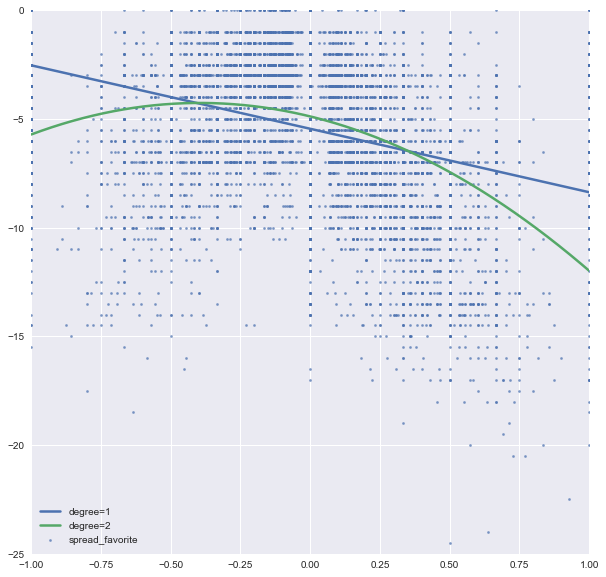

In [221]:
poly_regression(reg_df.win_pct_diff, reg_df.spread_favorite, [1,2],-1,1, -25, 0,-1,1)

In [175]:
import statsmodels.api as sm
import statsmodels.formula.api as sm

# X = categorical **3
# X2 = sm.add_constant(X)
model = sm.ols(formula = 'spread_favorite ~ np.power(win_pct_diff, 1)', data = reg_df).fit()

# est = sm.OLS(target, X2)
# est2 = est.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        spread_favorite   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     995.0
Date:                Wed, 08 Aug 2018   Prob (F-statistic):          8.30e-207
Time:                        16:40:59   Log-Likelihood:                -22499.
No. Observations:                8647   AIC:                         4.500e+04
Df Residuals:                    8645   BIC:                         4.502e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

# First Variable- Home Favorite

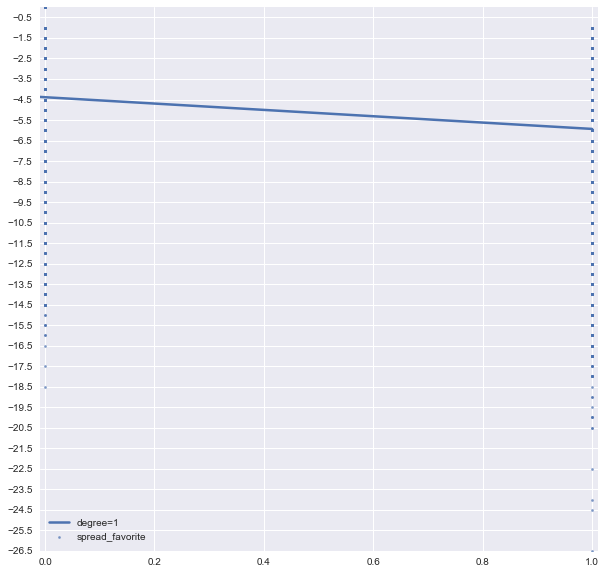

In [222]:
poly_regression(reg_df.home_favorite, reg_df.spread_favorite, [1],-.01,1.01, -25, 0,-1,1)
plt.yticks(np.arange(-26.5,0,1));

In [212]:
import statsmodels.api as sm
import statsmodels.formula.api as sm

# X = categorical **3
# X2 = sm.add_constant(X)
model = sm.ols(formula = 'spread_favorite ~ np.power(home_favorite, 1)', data = reg_df).fit()

# est = sm.OLS(target, X2)
# est2 = est.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        spread_favorite   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     412.5
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           1.24e-89
Time:                        17:07:34   Log-Likelihood:                -22769.
No. Observations:                8647   AIC:                         4.554e+04
Df Residuals:                    8645   BIC:                         4.556e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
# data = {"a":[2, 3, 5], "b":[2, 3, 5], "c":[2, 3, 5]}
# model = sm.ols(formula = 'a ~ np.power(b, 2) + b + c', data = reg_df).fit()

# SECOND VARIABLE - Exp Win Difference

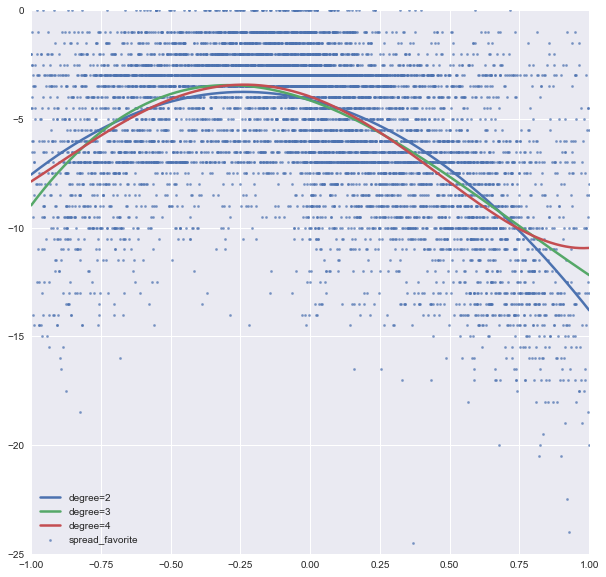

In [223]:
poly_regression(reg_df.exp_win_difference, reg_df.spread_favorite, [2,3,4],-1,1, -25, 0,-1,1)

In [142]:
import statsmodels.api as sm
import statsmodels.formula.api as sm

# X = categorical **3
# X2 = sm.add_constant(X)
model = sm.ols(formula = 'spread_favorite ~ np.power(exp_win_difference, 2)', data = reg_df).fit()

# est = sm.OLS(target, X2)
# est2 = est.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        spread_favorite   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     1911.
Date:                Wed, 08 Aug 2018   Prob (F-statistic):               0.00
Time:                        16:28:56   Log-Likelihood:                -22107.
No. Observations:                8647   AIC:                         4.422e+04
Df Residuals:                    8645   BIC:                         4.423e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [291]:
import statsmodels.api as sm
import statsmodels.formula.api as sm

# X = categorical **3
# X2 = sm.add_constant(X)
model = sm.ols(formula = 'spread_favorite ~ home_favorite + np.power(exp_win_difference, 2)', data = reg_df).fit()

# est = sm.OLS(target, X2)
# est2 = est.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        spread_favorite   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     1588.
Date:                Wed, 08 Aug 2018   Prob (F-statistic):               0.00
Time:                        17:55:20   Log-Likelihood:                -21617.
No. Observations:                8647   AIC:                         4.324e+04
Df Residuals:                    8644   BIC:                         4.326e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

# WEEK- REJECTED LOW PREDICTABILITY

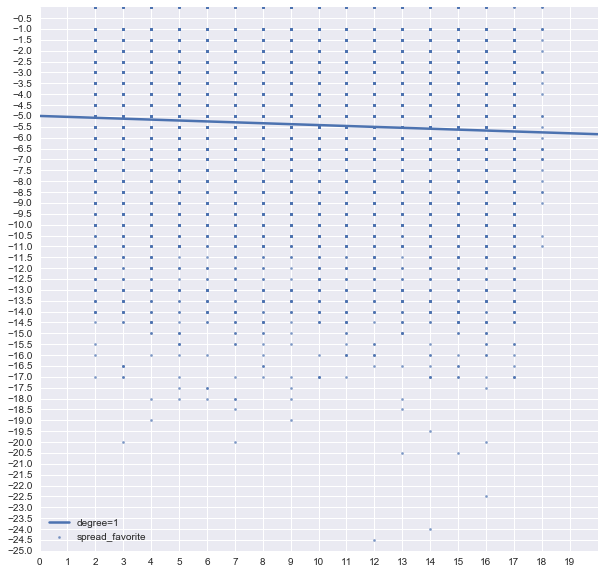

In [240]:
poly_regression(reg_df.schedule_week, reg_df.spread_favorite, [1],0,20, -25, 0,0,25)
plt.yticks(np.arange(-25,0,.5))
plt.xticks(np.arange(0,20,1));

In [233]:
import statsmodels.api as sm
import statsmodels.formula.api as sm

# X = categorical **3
# X2 = sm.add_constant(X)
model = sm.ols(formula = 'spread_favorite ~ np.power(schedule_week, 1)', data = reg_df).fit()

# est = sm.OLS(target, X2)
# est2 = est.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        spread_favorite   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     27.36
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           1.73e-07
Time:                        17:14:38   Log-Likelihood:                -22957.
No. Observations:                8647   AIC:                         4.592e+04
Df Residuals:                    8645   BIC:                         4.593e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           